In [ ]:
# Library Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.svm import SVC,SVR
from sklearn import datasets
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
# Read the CSV file
df=pd.read_csv("Frogs_MFCCs.csv")

#remove last column from dataframe
df = df.iloc[:, :-1]

#remove family and genus from dataframe
df = df.drop(['Family', 'Genus'], axis=1)
# Convert the SPECIES column to float
df['Species'] = df['Species'].astype('category')
df['Species'] = df['Species'].cat.codes

#convert the species column to float
df['Species'] = df['Species'].astype('float')
#print the type of columns
print(df.dtypes)

MFCCs_ 1    float64
MFCCs_ 2    float64
MFCCs_ 3    float64
MFCCs_ 4    float64
MFCCs_ 5    float64
MFCCs_ 6    float64
MFCCs_ 7    float64
MFCCs_ 8    float64
MFCCs_ 9    float64
MFCCs_10    float64
MFCCs_11    float64
MFCCs_12    float64
MFCCs_13    float64
MFCCs_14    float64
MFCCs_15    float64
MFCCs_16    float64
MFCCs_17    float64
MFCCs_18    float64
MFCCs_19    float64
MFCCs_20    float64
MFCCs_21    float64
MFCCs_22    float64
Species     float64
dtype: object


In [ ]:
y = df.iloc[:, -1]
#all other columns are features
X = df.iloc[:, :-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

results = []
rf_params = {
    'C':stats.uniform(0,50),
    "kernel":['poly','rbf','sigmoid'],
    "epsilon":stats.uniform(0,1)
}
n_iter_search=20
clf = SVR(gamma='scale')
for i in range(20):
  Random = RandomizedSearchCV(clf, param_distributions=rf_params,n_iter=n_iter_search,cv=3,scoring='neg_mean_squared_error')
  Random.fit(X, y)
  print(Random.best_params_)
  y_pred = Random.predict(X_test)
  r2 = r2_score(y_test, y_pred)
  params = Random.best_params_
  result = {'Iteration': i+1, 'Accuracy': r2, 'C': params['C'], 'Kernel': params['kernel']}
  results.append(result)
results_df = pd.DataFrame(results)
results_df.to_csv('svm_results.csv',index=False)

KeyboardInterrupt: ignored

In [ ]:
results_df

,Iteration,Accuracy,C,Kernel
0,1,0.934028,44.959829,poly
1,2,0.962139,41.417437,rbf
2,3,0.942178,24.129531,rbf
3,4,0.960994,47.730251,rbf
4,5,0.945082,30.891353,rbf
5,6,0.956296,33.578349,rbf
6,7,0.937523,25.576031,rbf
7,8,0.954903,40.432738,rbf
8,9,0.943284,25.428423,rbf
9,10,0.950487,28.910985,rbf


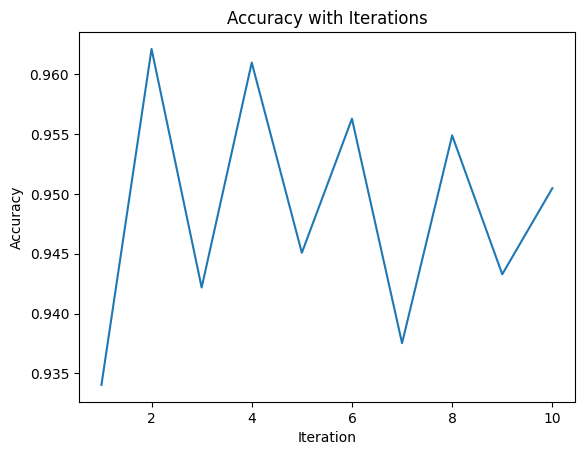

In [ ]:
import matplotlib.pyplot as plt
plt.plot(results_df['Iteration'], results_df['Accuracy'])
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy with Iterations')
plt.show()